In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Import image
IMG_FILENAME = 'bug.png'
IMG_GRAY = plt.imread(IMG_FILENAME)
IMG_GRAY.shape

(340, 278)

In [22]:
# Create finite difference kernel
n = 3
center = int(n/2 - 0.5)

Dx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
Dy = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Lap = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

C:\Users\WBS\AppData\Local\Temp\ipykernel_9192\2729327506.py:16: RuntimeWarning: divide by zero encountered in divide
  IMG_ARCTAN = np.arctan(IMG_DY/IMG_DX)
C:\Users\WBS\AppData\Local\Temp\ipykernel_9192\2729327506.py:16: RuntimeWarning: invalid value encountered in divide
  IMG_ARCTAN = np.arctan(IMG_DY/IMG_DX)


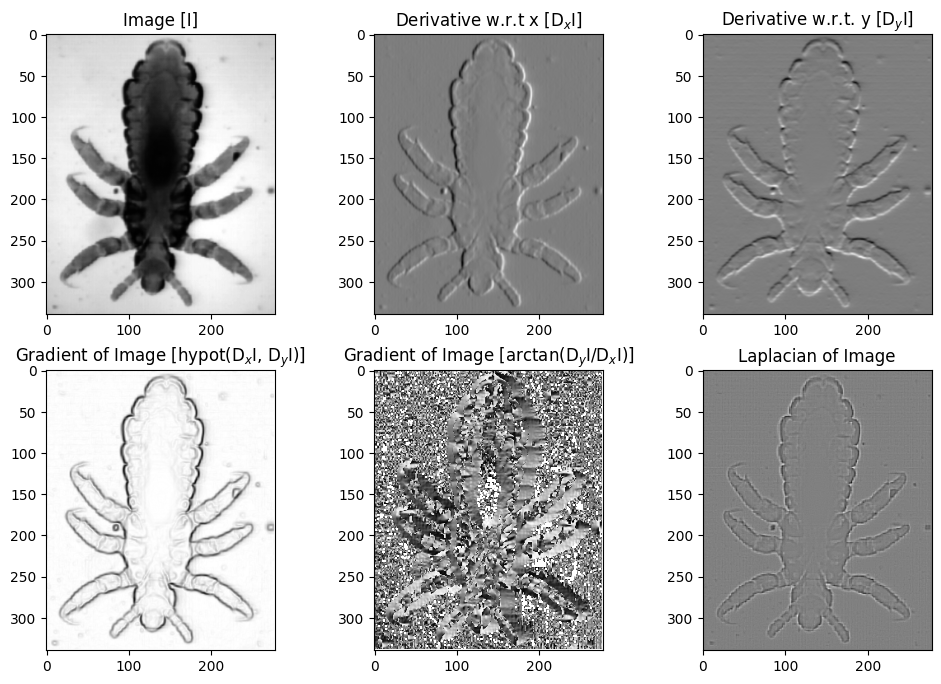

In [28]:
# Convolution of kernel with noisy image
IMG_DX = np.zeros_like(IMG_GRAY)
IMG_DY = np.zeros_like(IMG_GRAY)
IMG_LAPLACIAN = np.zeros_like(IMG_GRAY)
Y, X = IMG_DX.shape

# DX, DY
for y in range(center, Y-center):
    for x in range(center, X-center):
        IMG_DX[y,x] = np.sum(IMG_GRAY[y-center:y+center+1,x-center:x+center+1] * Dx)
        IMG_DY[y,x] = np.sum(IMG_GRAY[y-center:y+center+1,x-center:x+center+1] * Dy)
        IMG_LAPLACIAN[y,x] = np.sum(IMG_GRAY[y-center:y+center+1,x-center:x+center+1] * Lap)

# GRADIENT
IMG_GRADIENT = 1 - np.sqrt(IMG_DX**2 + IMG_DY**2)
IMG_ARCTAN = np.arctan(IMG_DY/IMG_DX)

fig, ax = plt.subplots(2, 3, figsize=(12,8))
ax[0,0].imshow(IMG_GRAY, cmap='gray')
ax[0,0].set_title('Image [I]')
ax[0,1].imshow(IMG_DX, cmap='gray')
ax[0,1].set_title('Derivative w.r.t x [D$_x$I]')
ax[0,2].imshow(IMG_DY, cmap='gray')
ax[0,2].set_title('Derivative w.r.t. y [D$_y$I]')

ax[1,0].imshow(IMG_GRADIENT, cmap='gray')
ax[1,0].set_title('Gradient of Image [hypot(D$_x$I, D$_y$I)]')
ax[1,1].imshow(IMG_ARCTAN, cmap='gray')
ax[1,1].set_title('Gradient of Image [arctan(D$_y$I/D$_x$I)]')
ax[1,2].imshow(IMG_LAPLACIAN, cmap='gray')
ax[1,2].set_title('Laplacian of Image')

plt.show()